In [1]:
pwd

'C:\\Users\\DELL\\ML rough\\heart project'

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('heart_disease.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

C:\DR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

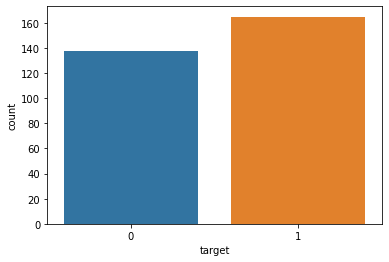

In [7]:
sns.countplot(data['target'])

In [17]:
x = data.iloc[:,:-1]
Y = data['target']

In [18]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.25,random_state=20)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
s=StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

Minimum error:- 0.11842105263157894 at K= 19


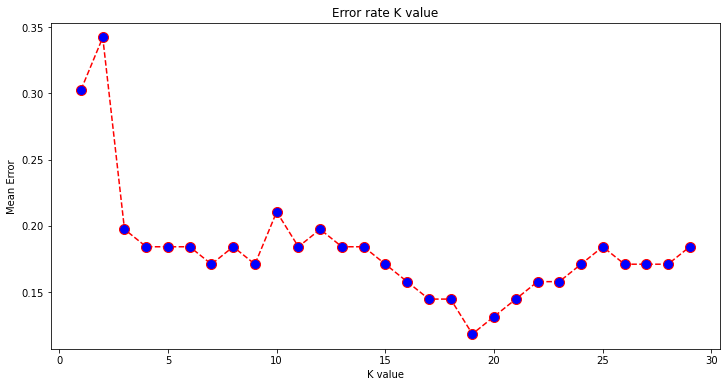

In [25]:
error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,Y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color = 'red',linestyle = 'dashed', marker = 'o',markerfacecolor = 'blue', markersize = 10)
plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K=",error.index(min(error))+1)

In [26]:
classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(x_train,Y_train)

KNeighborsClassifier(n_neighbors=19)

In [27]:
y_pred= classifier.predict(x_test)

In [28]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
confusion_matrix = confusion_matrix(Y_test,y_pred)
confusion_matrix

array([[24,  7],
       [ 2, 43]], dtype=int64)

In [32]:
accuracy_score(Y_test,y_pred)

0.881578947368421